In [7]:
from google.colab import files
uploaded=files.upload();

Saving data.csv to data.csv


In [47]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_percentage_error as mpe

In [11]:
data = pd.read_csv('data.csv')  
data

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
81,0,11.5,5.9,0,0,0,0,Female
82,1,13.7,6.7,1,1,1,1,Male
83,1,12.2,5.1,0,1,0,0,Female
84,1,13.7,5.1,0,0,0,1,Female


In [12]:
# information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  86 non-null     int64  
 1   forehead_width_cm          86 non-null     float64
 2   forehead_height_cm         86 non-null     float64
 3   nose_wide                  86 non-null     int64  
 4   nose_long                  86 non-null     int64  
 5   lips_thin                  86 non-null     int64  
 6   distance_nose_to_lip_long  86 non-null     int64  
 7   gender                     86 non-null     object 
dtypes: float64(2), int64(5), object(1)
memory usage: 5.5+ KB


In [13]:
# Data of values(Max, min, std...)
data.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000
mean,0.813953,13.304651,5.859302,0.488372,0.500000,0.546512,0.511628
std,0.391427,1.190344,0.533882,0.502797,0.502933,0.500752,0.502797
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.400000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.400000,5.900000,0.000000,0.500000,1.000000,1.000000
75%,1.000000,14.200000,6.275000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


In [14]:
# Data Correlation: Relationship between columns
data.corr()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
long_hair,1.000000,0.034704,0.115343,-0.011121,-0.119523,-0.075376,-0.108434
forehead_width_cm,0.034704,1.000000,0.007706,0.184867,0.186691,0.234506,0.056914
forehead_height_cm,0.115343,0.007706,1.000000,0.136272,0.129255,0.167786,0.245024
nose_wide,-0.011121,0.184867,0.136272,1.000000,0.511766,0.516168,0.489177
nose_long,-0.119523,0.186691,0.129255,0.511766,1.000000,0.537213,0.511766
lips_thin,-0.075376,0.234506,0.167786,0.516168,0.537213,1.000000,0.652002
distance_nose_to_lip_long,-0.108434,0.056914,0.245024,0.489177,0.511766,0.652002,1.000000


Female    44
Male      42
Name: gender, dtype: int64

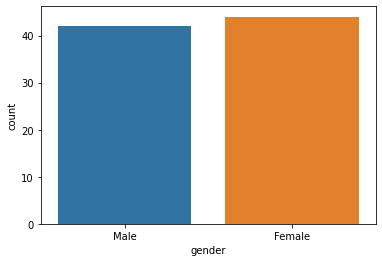

In [21]:
sns.countplot(x = "gender", data = data)
data.loc[:,"gender"].value_counts()

In [24]:
data_nbc = pd.read_csv("data.csv")
data_nbc

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
81,0,11.5,5.9,0,0,0,0,Female
82,1,13.7,6.7,1,1,1,1,Male
83,1,12.2,5.1,0,1,0,0,Female
84,1,13.7,5.1,0,0,0,1,Female


In [25]:
data_nbc.gender = [1 if i == "Male" else 0 for i in data_nbc.gender]

In [26]:
data_nbc

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0
...,...,...,...,...,...,...,...,...
81,0,11.5,5.9,0,0,0,0,0
82,1,13.7,6.7,1,1,1,1,1
83,1,12.2,5.1,0,1,0,0,0
84,1,13.7,5.1,0,0,0,1,0


In [27]:
x_data = data_nbc.drop(["gender"],axis = 1)

# y_data
y_data = data_nbc.gender.values

In [28]:
x_data

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,1,11.8,6.1,1,0,1,1
1,0,14.0,5.4,0,0,1,0
2,0,11.8,6.3,1,1,1,1
3,0,14.4,6.1,0,1,1,1
4,1,13.5,5.9,0,0,0,0
...,...,...,...,...,...,...,...
81,0,11.5,5.9,0,0,0,0
82,1,13.7,6.7,1,1,1,1
83,1,12.2,5.1,0,1,0,0
84,1,13.7,5.1,0,0,0,1


In [29]:
y_data

array([1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1])

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.3, random_state=3)

In [31]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(x_train, y_train)

print("print Train for accuracy of NBC algo: ", gnb.score(x_train,y_train))
print("print Test for accuracy of NBC algo: ", gnb.score(x_test,y_test))

print Train for accuracy of NBC algo:  0.9666666666666667
print Test for accuracy of NBC algo:  0.9230769230769231


In [36]:
predict=gnb.predict(x_test)
predict

array([1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1])

In [38]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.93      0.93      0.93        14

    accuracy                           0.92        26
   macro avg       0.92      0.92      0.92        26
weighted avg       0.92      0.92      0.92        26



In [42]:
error = mae(y_test, predict)
  
# display
print("Mean absolute error : " + str(error))

Mean absolute error : 0.07692307692307693


In [45]:
error = mse(y_test, predict)
  
# display
print("Mean Squared error : " + str(error))

Mean Squared error : 0.07692307692307693


In [51]:
from math import sqrt
print("root mean squared error: "+str(sqrt(mse(y_test, predict))))

root mean squared error: 0.2773500981126146
